In [1]:
import matplotlib.pyplot as plt
import numpy as np
import skimage
import time

# Image filtering and enhancement

# 3.1

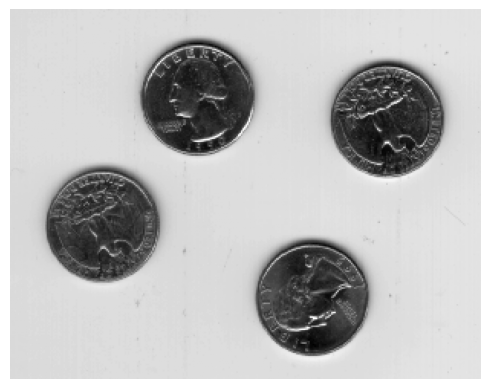

In [2]:
IMG = skimage.io.imread('eight.tif')
IMG = skimage.util.img_as_float(IMG)
plt.imshow(IMG, cmap='gray')
plt.axis('off')
plt.show()

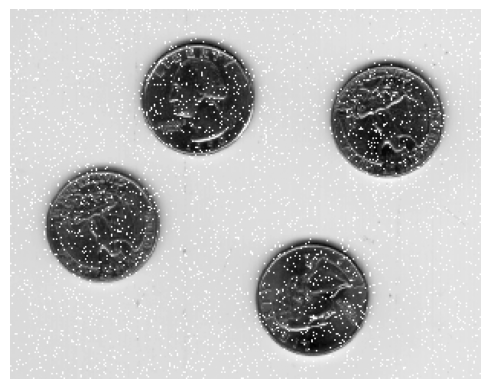

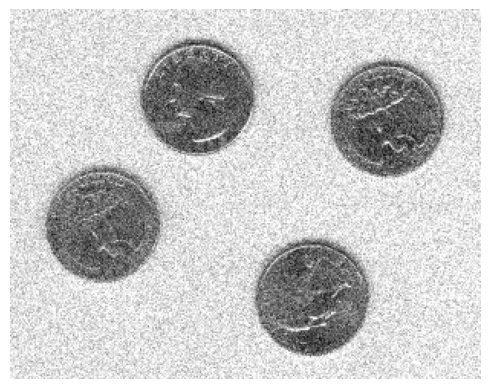

In [3]:
IMG_salt = skimage.util.random_noise(IMG, mode='salt', amount=0.05)
IMG_gaussian = skimage.util.random_noise(IMG, mode='gaussian', var=0.01)

plt.figure(1)
plt.imshow(IMG_salt, cmap='gray')
plt.axis('off')
plt.figure(2)
plt.imshow(IMG_gaussian, cmap='gray')
plt.axis('off')
plt.show()

Applying rank mean and median filters with N=1...
Rank mean filter took 0.90 seconds.
Rank median filter took 0.66 seconds.
Applying rank mean and median filters with N=3...
Rank mean filter took 0.68 seconds.
Rank median filter took 0.79 seconds.
Applying rank mean and median filters with N=6...
Rank mean filter took 0.75 seconds.
Rank median filter took 0.99 seconds.
Applying rank mean and median filters with N=9...
Rank mean filter took 0.83 seconds.
Rank median filter took 1.13 seconds.
Applying rank mean and median filters with N=11...
Rank mean filter took 0.83 seconds.
Rank median filter took 1.10 seconds.
Applying rank mean and median filters with N=14...
Rank mean filter took 0.93 seconds.
Rank median filter took 1.21 seconds.
Applying rank mean and median filters with N=17...
Rank mean filter took 1.02 seconds.
Rank median filter took 1.37 seconds.
Applying rank mean and median filters with N=19...
Rank mean filter took 1.04 seconds.
Rank median filter took 1.41 seconds.
Appl

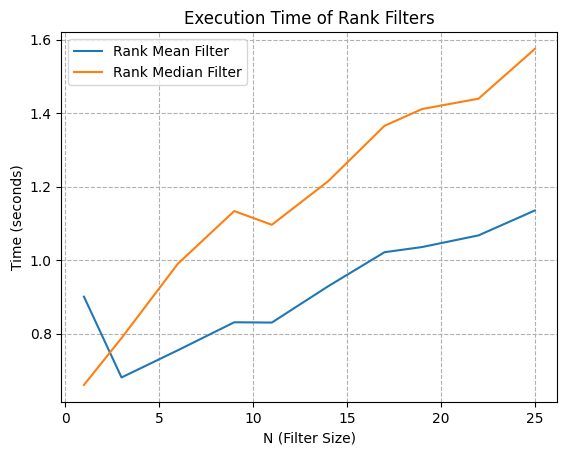

In [4]:

timings_mean = []
timings_median = []
times = np.linspace(1, 25, 10, dtype=int)  

for N in times:
    
    print(f'Applying rank mean and median filters with N={N}...')

    st = time.time()
    for _ in range(100):
        IMG_rank_mean = skimage.filters.rank.mean(skimage.util.img_as_ubyte(IMG_salt), footprint=np.ones((N, N)))
    timings_mean.append(time.time() - st)
    print(f'Rank mean filter took {time.time() - st:.2f} seconds.')

    st = time.time()
    for _ in range(100):
        IMG_rank_median = skimage.filters.rank.median(skimage.util.img_as_ubyte(IMG_salt), footprint=np.ones((N, N)))
    timings_median.append(time.time() - st)
    print(f'Rank median filter took {time.time() - st:.2f} seconds.')

    #plt.figure(1)
    #plt.imshow(IMG_rank_mean, cmap='gray')
    #plt.axis('off')
    #plt.figure(2)
    #plt.imshow(IMG_rank_median, cmap='gray')
    #plt.axis('off')
    #plt.show()

plt.plot(times, timings_mean, label='Rank Mean Filter')
plt.plot(times, timings_median, label='Rank Median Filter')
plt.xlabel('N (Filter Size)')
plt.ylabel('Time (seconds)')
plt.title('Execution Time of Rank Filters')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

Applying rank mean and median filters with N=1...
Rank mean filter took 0.66 seconds.
Rank median filter took 0.65 seconds.
Applying rank mean and median filters with N=3...
Rank mean filter took 0.70 seconds.
Rank median filter took 1.05 seconds.
Applying rank mean and median filters with N=6...
Rank mean filter took 0.73 seconds.
Rank median filter took 1.55 seconds.
Applying rank mean and median filters with N=9...
Rank mean filter took 0.78 seconds.
Rank median filter took 1.65 seconds.
Applying rank mean and median filters with N=11...
Rank mean filter took 0.79 seconds.
Rank median filter took 1.60 seconds.
Applying rank mean and median filters with N=14...
Rank mean filter took 0.83 seconds.
Rank median filter took 1.56 seconds.
Applying rank mean and median filters with N=17...
Rank mean filter took 0.87 seconds.
Rank median filter took 1.59 seconds.
Applying rank mean and median filters with N=19...
Rank mean filter took 0.89 seconds.
Rank median filter took 1.57 seconds.
Appl

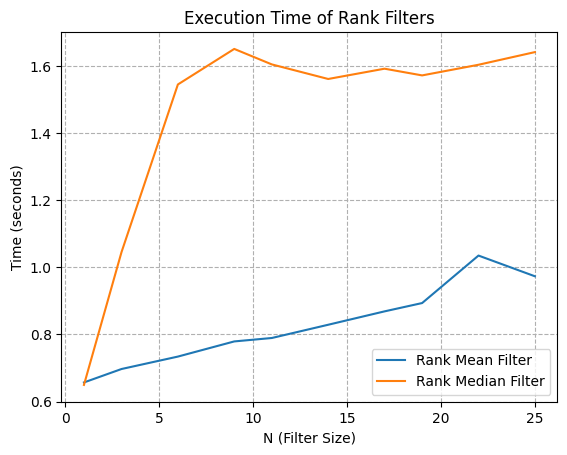

In [5]:

timings_mean = []
timings_median = []
times = np.linspace(1, 25, 10, dtype=int)  

for N in times:
    
    print(f'Applying rank mean and median filters with N={N}...')

    st = time.time()
    for _ in range(100):
        IMG_rank_mean = skimage.filters.rank.mean(skimage.util.img_as_ubyte(IMG_gaussian), footprint=np.ones((N, N)))
    timings_mean.append(time.time() - st)
    print(f'Rank mean filter took {time.time() - st:.2f} seconds.')

    st = time.time()
    for _ in range(100):
        IMG_rank_median = skimage.filters.rank.median(skimage.util.img_as_ubyte(IMG_gaussian), footprint=np.ones((N, N)))
    timings_median.append(time.time() - st)
    print(f'Rank median filter took {time.time() - st:.2f} seconds.')

    #plt.figure(1)
    #plt.imshow(IMG_rank_mean, cmap='gray')
    #plt.axis('off')
    #plt.figure(2)
    #plt.imshow(IMG_rank_median, cmap='gray')
    #plt.axis('off')
    #plt.show()

plt.plot(times, timings_mean, label='Rank Mean Filter')
plt.plot(times, timings_median, label='Rank Median Filter')
plt.xlabel('N (Filter Size)')
plt.ylabel('Time (seconds)')
plt.title('Execution Time of Rank Filters')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

# 3.2

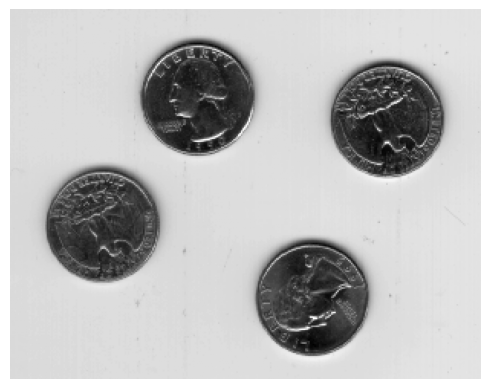

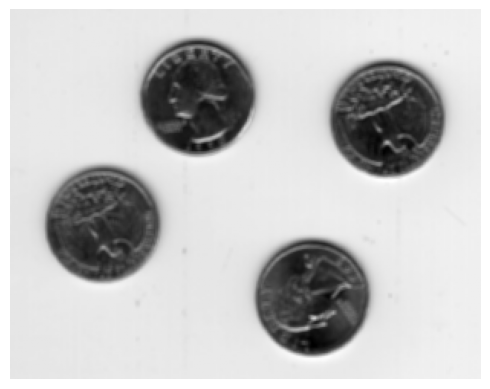

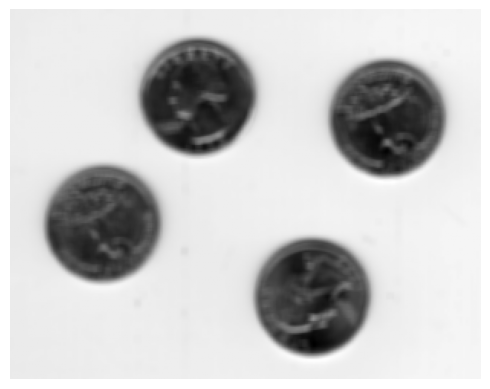

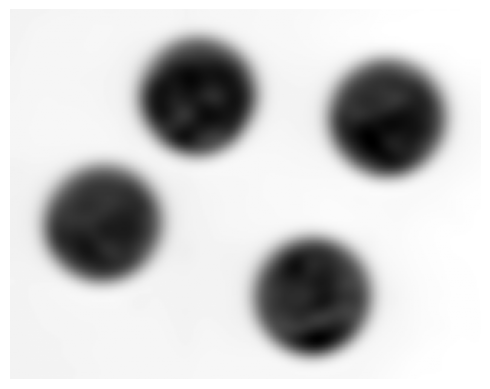

In [24]:
for N in [1,3,5,25]:

    kernel_size = N
    sigma = 5

    # Truncate is calculated as (kernel_size - 1) / (2 * sigma)
    IMG_filter_gaussian = skimage.filters.gaussian(IMG, sigma=sigma, truncate=(kernel_size - 1) / (2 * sigma))

    plt.imshow(IMG_filter_gaussian, cmap='gray')
    plt.axis('off')
    plt.show()

# 3.3

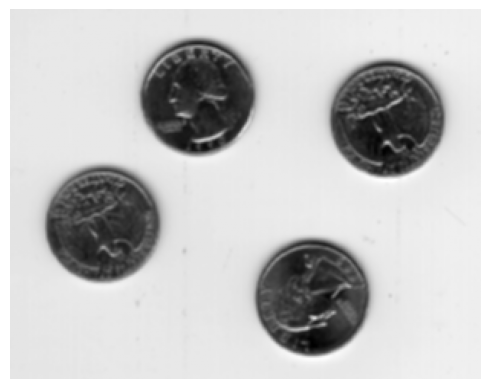

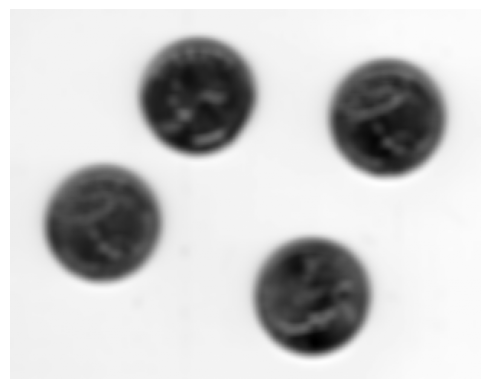

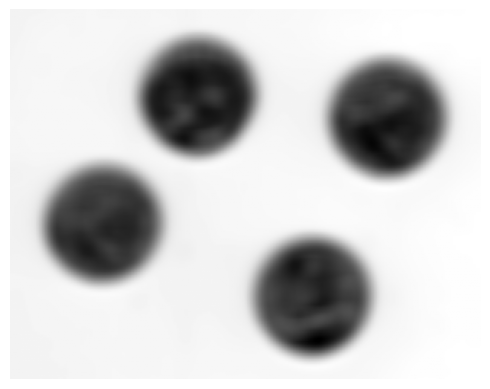

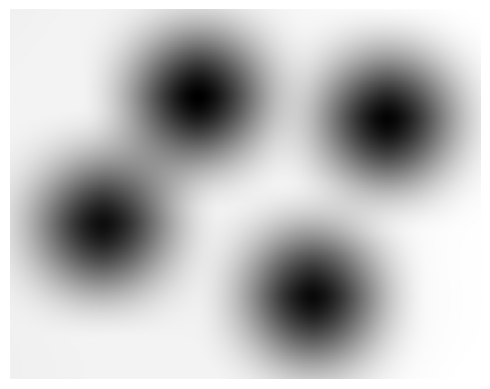

In [25]:
for N in [1,3,5,25]:

    sigma = N
    kernel_size = 3 * sigma

    # Truncate is calculated as (kernel_size - 1) / (2 * sigma)
    IMG_filter_gaussian = skimage.filters.gaussian(IMG, sigma=sigma, truncate=(kernel_size - 1) / (2 * sigma))

    plt.imshow(IMG_filter_gaussian, cmap='gray')
    plt.axis('off')
    plt.show()